In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
print(data.shape)

(284807, 31)


In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [7]:
data = data.sample(frac = 0.3,random_state = 1)
print(data.shape)

(85442, 31)


<Figure size 1080x360 with 0 Axes>

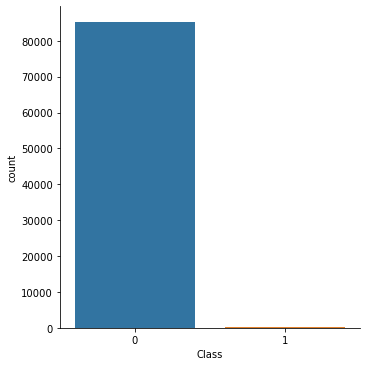

In [8]:
plt.figure(figsize=(15, 5))
sns.catplot(x='Class', kind='count', data = data)

In [9]:
print('No Frauds -', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds -', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds - 99.84 % of the dataset
Frauds - 0.16 % of the dataset


* There is an unbalanced data i.e. <strong> an unbalanced dataset is one in which the target variable has more observations in one specific class than the others.</strong>
* 99.83 % of dataset is of no fraud and 0.17% is of fraud

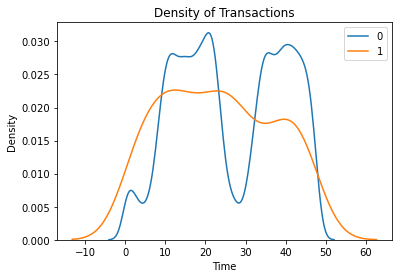

In [10]:
classes = [0, 1]
for x in classes:
    subset = data[data['Class'] == x]
    
    sns.distplot(subset['Time']/3600, hist = False)

plt.title('Density of Transactions')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend(data.Class.value_counts().index)

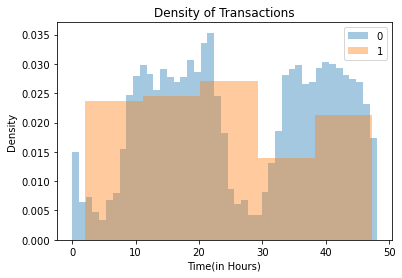

In [11]:
classes = [0, 1]
for x in classes:
    subset = data[data['Class'] == x]
    
    sns.distplot(subset['Time']/3600, hist = True, kde=False, norm_hist=True)

plt.title('Density of Transactions')
plt.xlabel('Time(in Hours)')
plt.ylabel('Density')
plt.legend(data.Class.value_counts().index)

* <strong> From the above plot we can see that the fraud Transaction occurs more between 00:00 to 10:00 
    </strong>

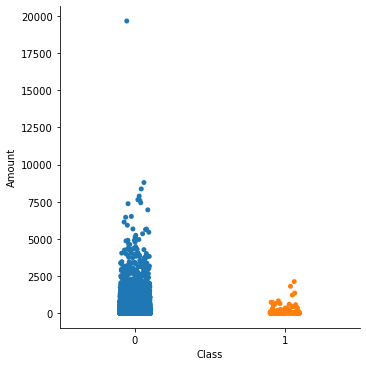

In [12]:
sns.catplot(x="Class", y="Amount", data=data)

<strong>* Fraud Amount is always less than 5000 </strong>

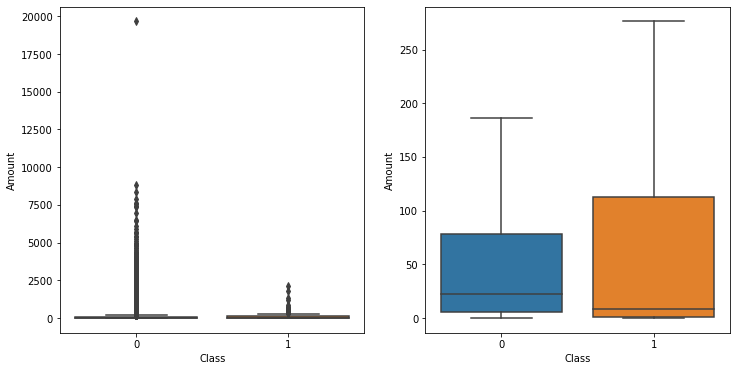

In [13]:
fig, (p1, p2) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(ax=p1, x="Class", y="Amount", data=data, showfliers=True)
sns.boxplot(ax=p2, x="Class", y="Amount", data=data, showfliers=False)
plt.show()

In [14]:
fraud_amt = data[data['Class'] == 1]["Amount"]
non_fraud_amt = data[data['Class'] == 0]["Amount"]
fraud_amt.describe()

count     135.000000
mean      144.546593
std       322.677448
min         0.000000
25%         1.000000
50%         8.540000
75%       112.425000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
non_fraud_amt.describe()

count    85307.000000
mean        88.564735
std        249.557598
min          0.000000
25%          5.880000
50%         22.130000
75%         78.000000
max      19656.530000
Name: Amount, dtype: float64

* <strong> The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraud transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.
</strong>

{'whiskers': [<matplotlib.lines.Line2D at 0x261f4abf040>,
 'caps': [<matplotlib.lines.Line2D at 0x261f4abf700>,
 'boxes': [<matplotlib.lines.Line2D at 0x261f4ab2ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x261f4abfdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x261f4acc160>],
 'means': []}

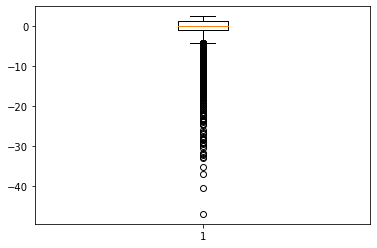

In [16]:
plt.boxplot(data.V1)

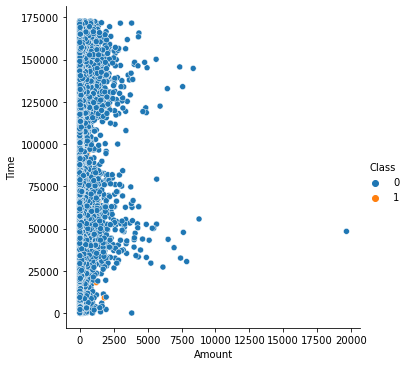

In [17]:
sns.relplot(x= 'Amount', y="Time", hue="Class", data=data)

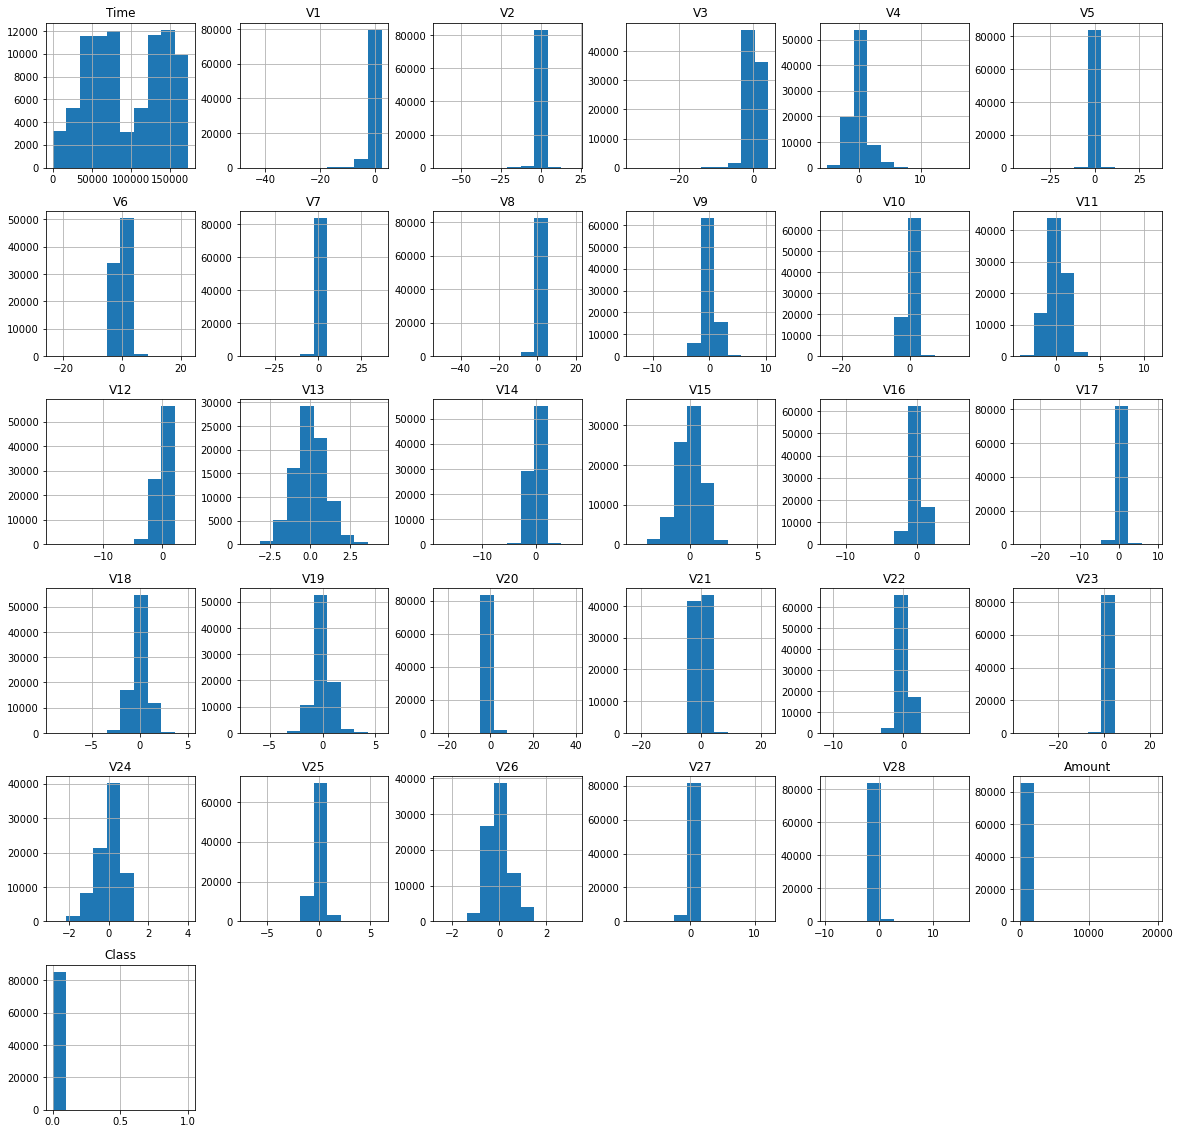

In [18]:
data.hist(figsize = (20,20))
plt.show()

In [19]:
#determine fraud cases
Fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('valid Cases: {}'.format(len(valid)))

0.001582519605659559
Fraud Cases: 135
valid Cases: 85307


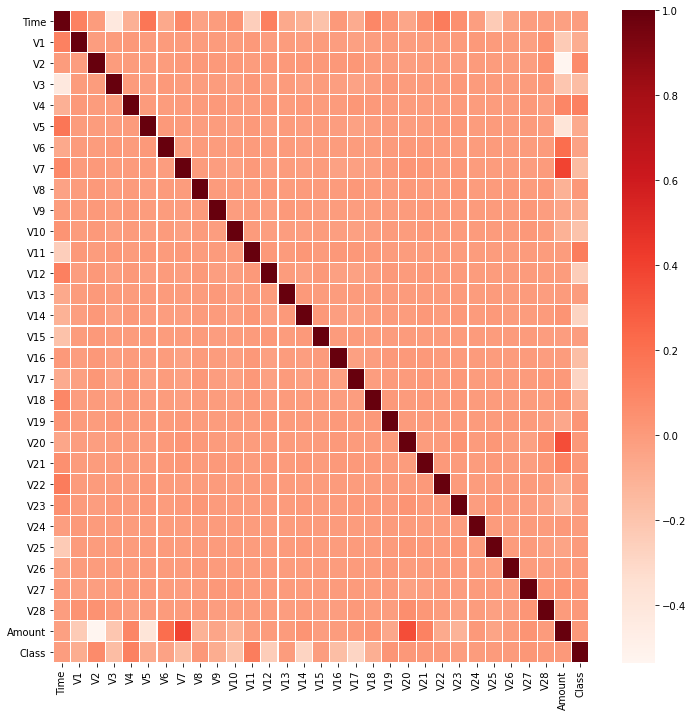

In [20]:
#correlation matrix
corrmat = data.corr()
plt.figure(figsize = (12,12))

sns.heatmap(corrmat, linewidths=.1, cmap="Reds")
plt.show()

* ###### There is no notable correlation between features V1-V28. 
* ###### There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

In [21]:
#get all the colomns from dataframe
columns = data.columns.tolist()

#filtering the columns we dont want,
columns = [c for c in columns if c not in ['Class']]

#storing the predecting varaibles
target = "Class"
X = data[columns]
Y = data[target]

#print the shapes of X and Y
print(X.shape)
print(Y.shape)

(85442, 30)
(85442,)


In [22]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random state
state = 1

# define the outlier detection method
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                       contamination = outlier_fraction,
                                       random_state = state),
    
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [23]:
n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

Isolation Forest: 193
0.9977411577444348
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.29      0.29      0.29       135

    accuracy                           1.00     85442
   macro avg       0.64      0.64      0.64     85442
weighted avg       1.00      1.00      1.00     85442

Local Outlier Factor: 263
0.9969218885325718
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.03      0.03      0.03       135

    accuracy                           1.00     85442
   macro avg       0.51      0.51      0.51     85442
weighted avg       1.00      1.00      1.00     85442

